In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [27]:
# Load the dataset
file_path = 'IRIS.csv'  
iris_data = pd.read_csv(file_path)

In [28]:
# Encode the target variable
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

In [29]:
# Separate features and target
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [30]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [34]:
# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


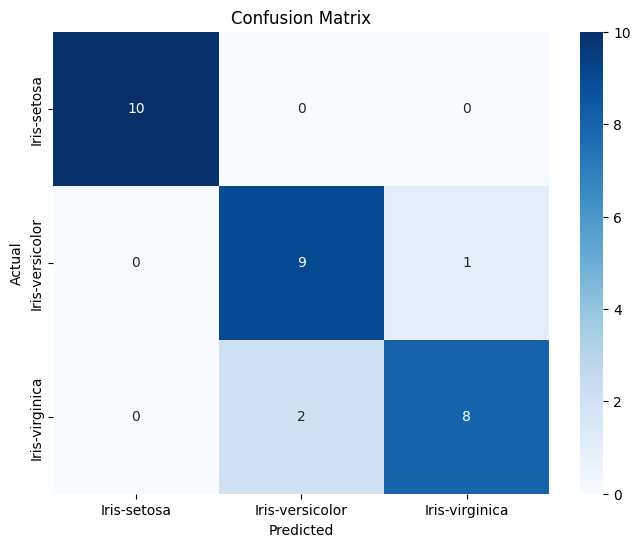

In [35]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Save the model and scaler
joblib.dump(model, 'iris_model.pkl')
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [37]:
# Save the LabelEncoder for decoding target labels
joblib.dump(label_encoder, 'iris_label_encoder.pkl')

['iris_label_encoder.pkl']